<a href="https://colab.research.google.com/github/subarna007/Dicee_APP/blob/master/subarnadahal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/hemrajojha/CSC410.git


Cloning into 'CSC410'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 9 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (9/9), done.


In [2]:
import pandas as pd

In [3]:

from google.colab import drive

In [4]:
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!ls

CSC410	drive  sample_data


In [6]:
content_file = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data.tsv',sep='\t')

In [7]:
title_file=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/titles.tsv',sep='\t',low_memory=False)

In [8]:
data=pd.merge(title_file,content_file,on="tconst")

In [9]:
data.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",5.7,1702
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short",6.1,210
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance",6.5,1462
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short",6.2,123
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short",6.2,2262


In [10]:
data.columns

Index(['tconst', 'titleType', 'primaryTitle', 'originalTitle', 'isAdult',
       'startYear', 'endYear', 'runtimeMinutes', 'genres', 'averageRating',
       'numVotes'],
      dtype='object')

In [11]:
data['genres'].value_counts()

Comedy                        82994
Drama                         73277
Documentary                   50425
Action,Adventure,Animation    27797
Reality-TV                    19843
                              ...  
Biography,Crime,Short             1
History,Romance,Short             1
Action,Family,Horror              1
Action,Musical,Mystery            1
Documentary,Music,Thriller        1
Name: genres, Length: 1934, dtype: int64

In [12]:
data['isAdult'].value_counts()

0       928836
1        18324
2014         1
2020         1
Name: isAdult, dtype: int64

In [13]:
data['averageRating'].value_counts()

7.2    33796
7.0    32394
7.6    32220
7.8    31930
7.4    31563
       ...  
1.5      273
1.4      254
1.2      194
1.3      173
1.1      161
Name: averageRating, Length: 91, dtype: int64

In [14]:
data['startYear'].unique()
data['startYear'].value_counts()

2014    41618
2013    41451
2012    41042
2015    38830
2011    38593
        ...  
1878        2
1889        2
1874        1
1877        1
1887        1
Name: startYear, Length: 139, dtype: int64

In [15]:
data['numVotes'].unique()
data['averageRating'].value_counts()

7.2    33796
7.0    32394
7.6    32220
7.8    31930
7.4    31563
       ...  
1.5      273
1.4      254
1.2      194
1.3      173
1.1      161
Name: averageRating, Length: 91, dtype: int64

In [16]:
import numpy
import matplotlib
%matplotlib inline

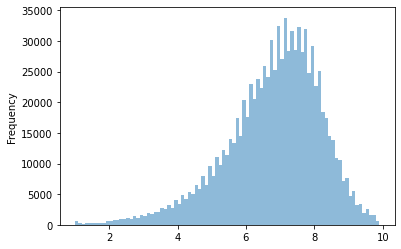

In [17]:
data['averageRating'].plot.hist(
    alpha = 0.5, bins = numpy.arange(1, 10, 0.1))

In [18]:
data['averageRating'].describe()

count    947162.000000
mean          6.868157
std           1.392151
min           1.000000
25%           6.100000
50%           7.000000
75%           7.800000
max          10.000000
Name: averageRating, dtype: float64

In [19]:
data['averageRating'].mode()

0    7.2
dtype: float64

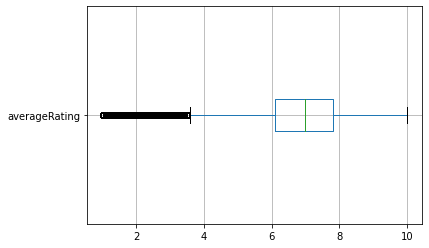

In [20]:
pd.DataFrame.boxplot(
    data, 'averageRating', vert = False, 
    return_type = 'axes')

In [21]:
import math

In [22]:
print('pandas variance: ' + str(data['averageRating'].var()))
print('pandas standard deviation: ' + str(data['averageRating'].std()))
mean = data['averageRating'].mean()
var = (data['averageRating'].sub(mean).pow(2).sum() / 
       data['averageRating'].count())
std = math.sqrt(var)
print('my variance: ' + str(var))
print('my standard deviation: ' + str(std))

pandas variance: 1.9380848195972955
pandas standard deviation: 1.392151148258441
my variance: 1.9380827733910024
my standard deviation: 1.3921504133501532


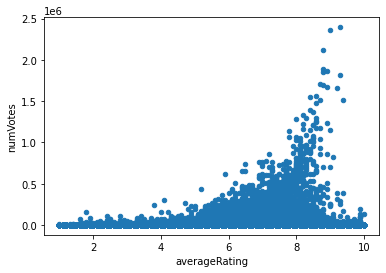

In [23]:
data.plot.scatter('averageRating','numVotes')